In [3]:
# Importing libraries
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Loading and merging data
data1 = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')
data1.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  631 non-null    object
 1   Player                631 non-null    object
 2   Tournament            631 non-null    object
 3   Matches               631 non-null    int64 
 4   Batting Innings       631 non-null    object
 5   Not Out               631 non-null    object
 6   Runds Scored          631 non-null    object
 7   Highest Score         631 non-null    object
 8   Batting Average       631 non-null    object
 9   Balls Faced           631 non-null    object
 10  Batting Strike Rate   631 non-null    object
 11  100                   631 non-null    object
 12  50                    631 non-null    object
 13  0                     631 non-null    object
 14  4s                    631 non-null    object
 15  6s                    631 non-null    ob

In [6]:
data2 = pd.read_csv('0y clean data pre ipl.csv')
data2.head()

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32178 entries, 0 to 32177
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        32178 non-null  int64  
 1   match_id          32178 non-null  int64  
 2   venue             32178 non-null  object 
 3   innings           32178 non-null  int64  
 4   ball              32178 non-null  float64
 5   batting_team      32178 non-null  object 
 6   bowling_team      32178 non-null  object 
 7   striker           32178 non-null  object 
 8   non_striker       32178 non-null  object 
 9   bowler            32178 non-null  object 
 10  runs_off_bat      32178 non-null  float64
 11  extras            32178 non-null  float64
 12  wicket_type       32178 non-null  object 
 13  player_dismissed  32178 non-null  object 
 14  run               32178 non-null  float64
 15  wickets           32178 non-null  float64
 16  truns             32178 non-null  float6

In [8]:
data1['Player'].unique().shape

(268,)

In [9]:
data2['striker'].unique().shape

(235,)

In [10]:
data = pd.merge(data2,data1,left_on='striker',right_on='Player')
data.drop(['wicket_type', 'player_dismissed','Unnamed: 0','match_id'], axis=1, inplace=True)
data.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,1,0
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,0,0
2,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,8,0
3,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,1,0
4,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75408 entries, 0 to 75407
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   venue                 75408 non-null  object 
 1   innings               75408 non-null  int64  
 2   ball                  75408 non-null  float64
 3   batting_team          75408 non-null  object 
 4   bowling_team          75408 non-null  object 
 5   striker               75408 non-null  object 
 6   non_striker           75408 non-null  object 
 7   bowler                75408 non-null  object 
 8   runs_off_bat          75408 non-null  float64
 9   extras                75408 non-null  float64
 10  run                   75408 non-null  float64
 11  wickets               75408 non-null  float64
 12  truns                 75408 non-null  float64
 13  y                     75408 non-null  float64
 14  Team                  75408 non-null  object 
 15  Player             

In [12]:
features = ['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'run', 'wickets', 'truns', 'y', 'Team', 'Player', 'Tournament', 'Matches', 'Batting Innings', 'Not Out', 'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced', 'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings', 'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken', 'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate', 'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets', 'Catches Taken', 'Stumpings Made']

for feature in features:
  print(f'{feature}:{data[feature].unique()}', '\n')

venue:['M Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk' 'Eden Gardens'
 'Newlands' 'Kingsmead' "St George's Park" 'New Wanderers Stadium'
 'SuperSport Park' 'Nehru Stadium' 'Dr DY Patil Sports Academy'
 'Holkar Cricket Stadium' 'Wankhede Stadium' 'Subrata Roy Sahara Stadium'
 'Sheikh Zayed Stadium' 'Dubai International Cricket Stadium'
 'JSCA International Stadium Complex' 'Sardar Patel Stadium, Motera'
 'Shaheed Veer Narayan Singh International Stadium'
 'Saurashtra Cricket Association Stadium' 'Feroz Shah Kotla'
 'Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium' 'M.Chinnaswamy Stadium'
 'Punjab Cricket Association Stadium, Mohali' 'Sawai Mansingh Stadium'
 'Brabourne Stadium' 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Barabati Stadium' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'MA Chidambaram Stadium' 'Buffalo Park'
 'Himachal Pradesh Cricket Association Stadium' 'Green Park'
 'Vidarbha Cricket Association Stadi

In [13]:
for feature in features:
  if '-' in data[feature].unique():
    print(f'{feature}:{data[feature].unique()}', np.dtype(data[feature]), '\n')

Batting Innings:['6' '16' '11' '10' '14' '12' '15' '13' '8' '7' '17' '1' '3' '5' '4' '9'
 '2' '-'] object 

Not Out:['0' '1' '5' '4' '9' '7' '8' '3' '2' '6' '-'] object 

Runds Scored:['127' '354' '319' '177' '395' '153' '373' '284' '290' '455' '416' '361'
 '143' '260' '40' '179' '71' '555' '398' '394' '388' '351' '282' '399'
 '442' '445' '383' '2' '11' '270' '234' '122' '86' '973' '308' '530' '464'
 '480' '382' '370' '393' '85' '501' '498' '479' '497' '521' '47' '324'
 '159' '264' '65' '98' '236' '252' '687' '216' '52' '73' '368' '490' '227'
 '200' '239' '253' '335' '489' '333' '286' '405' '92' '16' '29' '1' '453'
 '12' '64' '191' '36' '99' '141' '80' '136' '79' '848' '641' '692' '84'
 '248' '396' '344' '32' '18' '8' '170' '334' '91' '602' '123' '165' '-'
 '188' '42' '267' '24' '162' '33' '0' '134' '299' '27' '120' '332' '26'
 '158' '89' '106' '184' '206' '34' '63' '78' '44' '70' '357' '281' '301'
 '5' '161' '229' '55' '113' '529' '201' '4' '49' '21' '150' '77' '54'
 '291' '386' '441'

In [14]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include='object').columns
print(f'Categorical columns: {categorical_cols}')
numerical_cols = data.select_dtypes(exclude='object').columns
print(f'Numerical columns: {numerical_cols}')

# Replace '-' with mode for categorical columns
for col in categorical_cols:
  if data[col].mode()[0] != '-':
    data[col] = data[col].replace('-', data[col].mode()[0])
  else:
    data[col] = data[col].replace('-', data[col].value_counts().index[1])

# Check if all '-' values are replaced
print(data.isin(['-']).sum())


Categorical columns: Index(['venue', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'Team', 'Player', 'Tournament', 'Batting Innings', 'Not Out',
       'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced',
       'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings',
       'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken',
       'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate',
       'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets'],
      dtype='object')
Numerical columns: Index(['innings', 'ball', 'runs_off_bat', 'extras', 'run', 'wickets', 'truns',
       'y', 'Matches', 'Catches Taken', 'Stumpings Made'],
      dtype='object')
venue                   0
innings                 0
ball                    0
batting_team            0
bowling_team            0
striker                 0
non_striker             0
bowler                  0
runs_off_bat            0
extras        

In [15]:
# label encoding function

def labelEncoding(data):
    dataset = data.copy()
    for col in dataset.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
    return dataset

data_encoded = labelEncoding(data)

In [16]:
data

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,63,0,2/11,31.50,8.50,30.0,0,0,1,0
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,63,0,2/11,31.50,8.50,30.0,0,0,0,0
2,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,63,0,2/11,31.50,8.50,30.0,0,0,8,0
3,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,63,0,2/11,31.50,8.50,30.0,0,0,1,0
4,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,63,0,2/11,31.50,8.50,30.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75403,Eden Gardens,1,6.2,Royal Challengers Bangalore,Kolkata Knight Riders,AD Nath,V Kohli,AD Russell,1.0,0.0,...,63,0,2/11,31.50,8.50,30.0,0,0,0,0
75404,Eden Gardens,1,6.6,Royal Challengers Bangalore,Kolkata Knight Riders,AD Nath,V Kohli,AD Russell,0.0,0.0,...,63,0,2/11,31.50,8.50,30.0,0,0,1,0
75405,Eden Gardens,1,6.6,Royal Challengers Bangalore,Kolkata Knight Riders,AD Nath,V Kohli,AD Russell,0.0,0.0,...,63,0,2/11,31.50,8.50,30.0,0,0,1,0
75406,Eden Gardens,1,6.6,Royal Challengers Bangalore,Kolkata Knight Riders,AD Nath,V Kohli,AD Russell,0.0,0.0,...,63,0,2/11,31.50,8.50,30.0,0,0,0,0


In [17]:
data_encoded['y']

0        68.0
1        68.0
2        68.0
3        68.0
4        68.0
         ... 
75403    47.0
75404    47.0
75405    47.0
75406    47.0
75407    47.0
Name: y, Length: 75408, dtype: float64

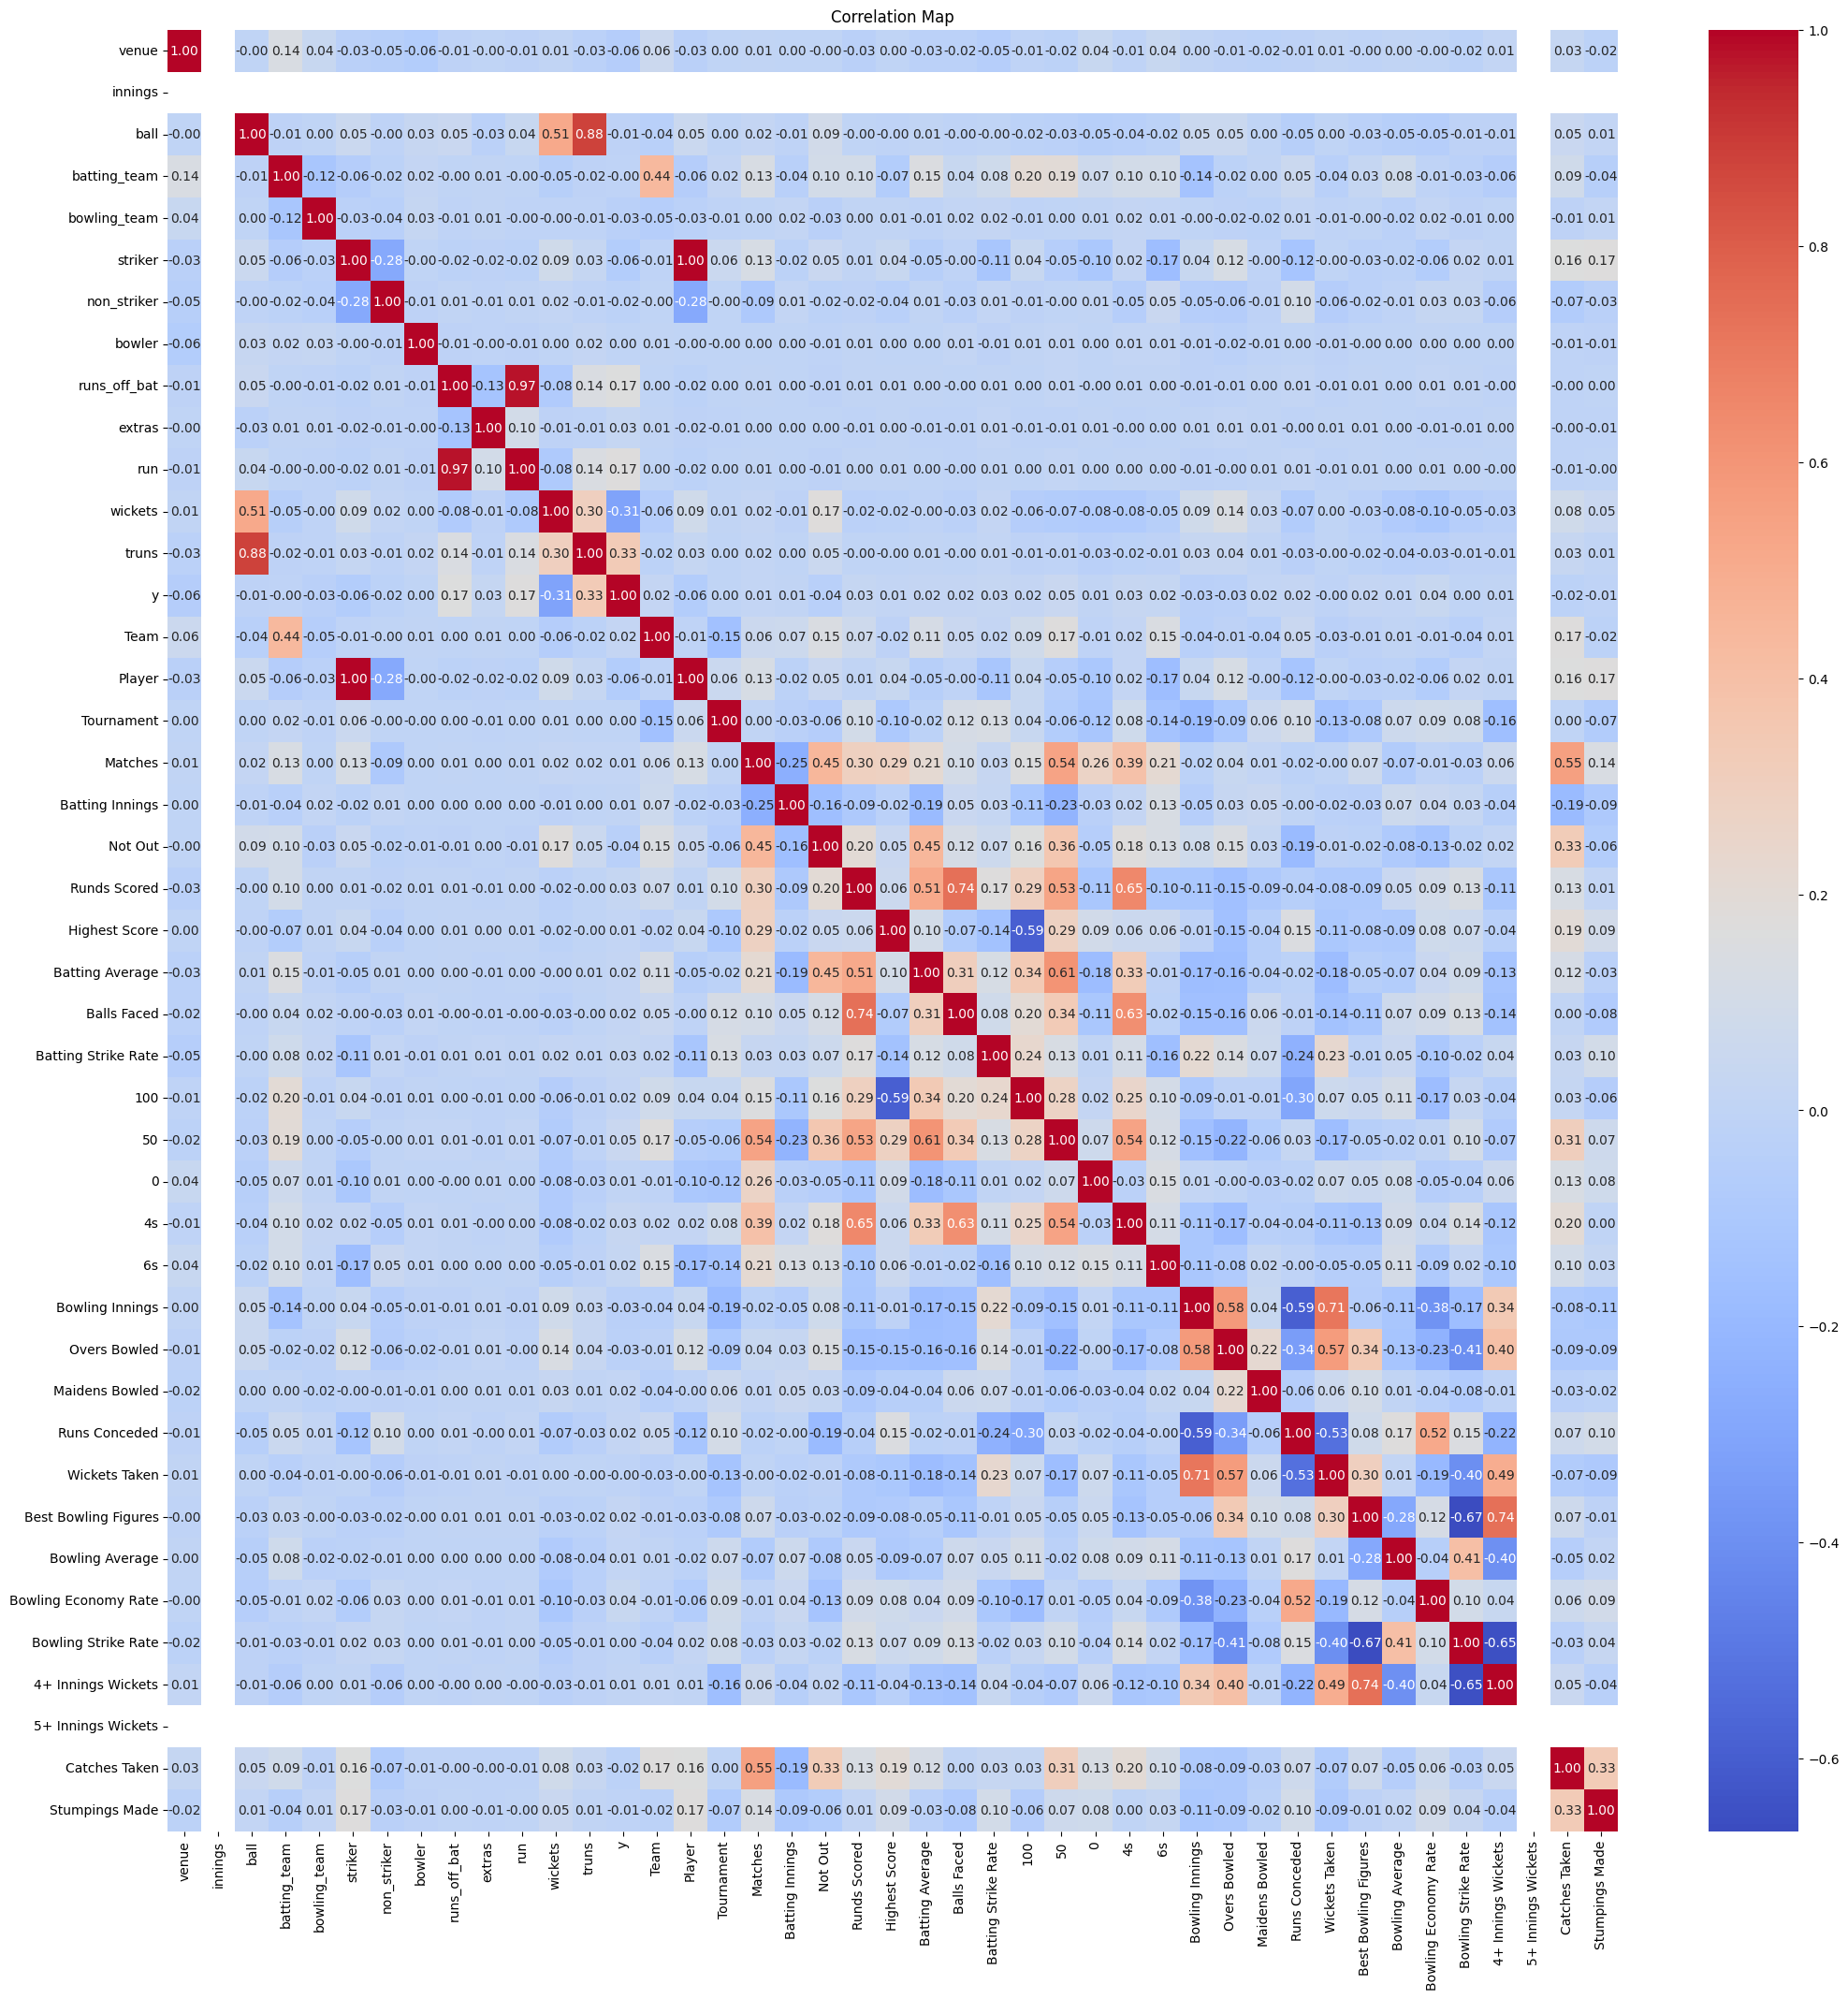

In [18]:
# Plotting correlation map
plt.figure(figsize=(25, 25))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

In [19]:
# Plotting correlation table
correlation_table = data_encoded.corr()
print(correlation_table)

                         venue  innings      ball  batting_team  bowling_team  \
venue                 1.000000      NaN -0.002515      0.138561      0.039174   
innings                    NaN      NaN       NaN           NaN           NaN   
ball                 -0.002515      NaN  1.000000     -0.013266      0.000954   
batting_team          0.138561      NaN -0.013266      1.000000     -0.119097   
bowling_team          0.039174      NaN  0.000954     -0.119097      1.000000   
striker              -0.033941      NaN  0.053359     -0.057639     -0.027923   
non_striker          -0.046926      NaN -0.004410     -0.016324     -0.040834   
bowler               -0.063405      NaN  0.029724      0.019048      0.027173   
runs_off_bat         -0.013401      NaN  0.047202     -0.002633     -0.005728   
extras               -0.000051      NaN -0.025341      0.007727      0.007052   
run                  -0.013453      NaN  0.041560     -0.000878     -0.004136   
wickets               0.0079

In [20]:
# Feature engineering and selection
X = data_encoded[['venue', 'innings', 'batting_team', 'bowling_team', 'striker', 'bowler', 'runs_off_bat', 'run', 'wickets', 'truns']].values
print(X)
y = data_encoded['y'].values
print(y)

[[15.  1.  7. ...  0.  0.  1.]
 [15.  1.  7. ...  0.  0.  1.]
 [15.  1.  7. ...  0.  0.  1.]
 ...
 [ 8.  1. 13. ...  0.  1. 47.]
 [ 8.  1. 13. ...  0.  1. 47.]
 [ 8.  1. 13. ...  0.  1. 47.]]
[68. 68. 68. ... 47. 47. 47.]


In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
# Model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1))

# Model compilation
model.compile(optimizer='adam', loss='mse')

In [24]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='min')

In [25]:
# Model training
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
1264/1264 [==============================] - 13s 6ms/step - loss: 1695.9270 - val_loss: 353.2355
Epoch 2/100
1264/1264 [==============================] - 7s 5ms/step - loss: 314.5722 - val_loss: 138.3605
Epoch 3/100
1264/1264 [==============================] - 7s 6ms/step - loss: 280.7927 - val_loss: 134.8998
Epoch 4/100
1264/1264 [==============================] - 7s 5ms/step - loss: 271.1841 - val_loss: 121.2780
Epoch 5/100
1264/1264 [==============================] - 7s 6ms/step - loss: 258.1361 - val_loss: 115.1617
Epoch 6/100
1264/1264 [==============================] - 7s 6ms/step - loss: 254.1358 - val_loss: 111.6102
Epoch 7/100
1264/1264 [==============================] - 7s 5ms/step - loss: 247.6688 - val_loss: 108.9183
Epoch 8/100
1264/1264 [==============================] - 7s 6ms/step - loss: 239.4810 - val_loss: 117.4425
Epoch 9/100
1264/1264 [==============================] - 7s 5ms/step - loss: 236.2736 - val_loss: 115.7163
Epoch 10/100
1264/1264 [===========

<Axes: >

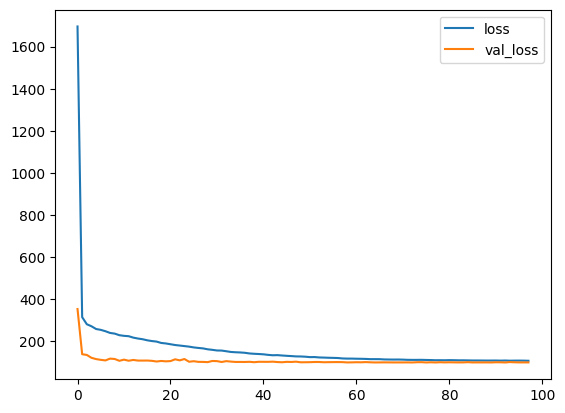

In [30]:
model_losses = pd.DataFrame(history.history)
model_losses.plot()

In [26]:
# Model evaluation
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

778/778 [==============================] - 1s 2ms/step
Mean Absolute Error: 7.569991071171039
Mean Squared Error: 96.96703147971829
Root Mean Squared Error: 9.847183936523086


Considering the typical range of scores in IPL matches, which can vary from around 100 to over 200 runs, an MAE of around 7.57 suggests that, on average, the model's predictions are within approximately 7 to 8 runs of the actual scores. Similarly, an RMSE of around 9.85 indicates the average magnitude of prediction errors, with higher weights on larger errors.

In the context of IPL score prediction, these values could be considered reasonably good.

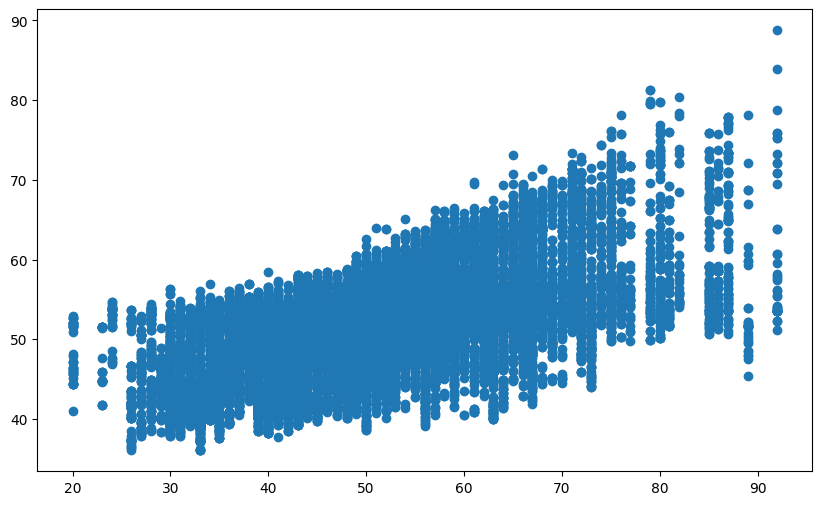

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)